# Task1 Exploration of the data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_bigram(input_list):
    two_gram = []
    for i in range(len(input_list)):
        for j in range(i + 1, len(input_list)):
            bigram = "%s,%s" % (input_list[i] ,input_list[j])
            two_gram.append(bigram)
    return two_gram

In [3]:
def find_threegram(input_list):
    three_gram_list = []
    for i in range(len(input_list)):
        for j in range(i + 1, len(input_list)):
            for k in range(j + 1, len(input_list)):
                three_gram = "%s,%s,%s" % (input_list[i], input_list[j] ,input_list[k])
                three_gram_list.append(three_gram)
    return three_gram_list

In [4]:
path = "./task1_data_again"
files= os.listdir(path) 
column_count = dict()
two_gram_dict = dict()
three_gram_dict = dict()
four_gram_dict = dict()
for file in files:
    cur = pd.read_json(path + '/' + file, typ='series')
    column_set = set()
    for column in cur['columns']:
        column_types = []
        for data_type in column['data_types']:  
            if data_type['type'] not in column_count:
                column_count.setdefault(data_type['type'], 0)
            column_count[data_type['type']] += 1
            column_types.append(data_type['type'])
        column_types.sort()
        if len(column_types) >= 2:
            column_bigram = find_bigram(column_types)
            for bigram in column_bigram:
                if bigram not in two_gram_dict:
                    two_gram_dict.setdefault(bigram, 0)
                two_gram_dict[bigram] += 1
        if len(column_types) >= 3:
            column_threegram_list = find_threegram(column_types)
            for threegram in column_threegram_list:
                if threegram not in three_gram_dict:
                    three_gram_dict.setdefault(threegram, 0)
                three_gram_dict[threegram] += 1
        if len(column_types) >= 4:
            four_gram = ",".join(column_types)
            if four_gram not in four_gram_dict:
                four_gram_dict.setdefault(four_gram, 0)
            four_gram_dict[four_gram] += 1
print(column_count)
print(two_gram_dict)
print(three_gram_dict)
print(four_gram_dict)

{'TEXT': 28208, 'REAL': 5604, 'INTEGER': 16878, 'DATE/TIME': 2249}
{'INTEGER,TEXT': 10729, 'DATE/TIME,TEXT': 1801, 'INTEGER,REAL': 752, 'REAL,TEXT': 3123, 'DATE/TIME,INTEGER': 377, 'DATE/TIME,REAL': 198}
{'INTEGER,REAL,TEXT': 750, 'DATE/TIME,INTEGER,TEXT': 372, 'DATE/TIME,INTEGER,REAL': 64, 'DATE/TIME,REAL,TEXT': 197}
{'DATE/TIME,INTEGER,REAL,TEXT': 64}


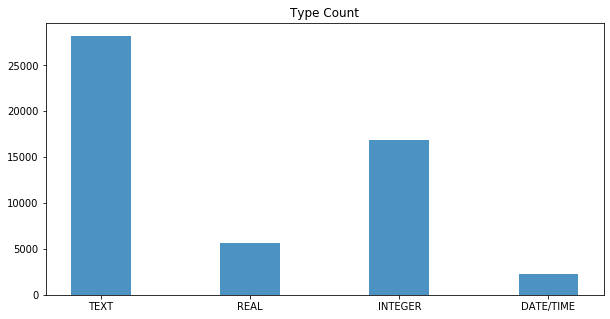

In [5]:
keys = list(column_count.keys())
values = list(column_count.values())
plt.figure(figsize=(10,5))
plt.bar(keys, values, width=0.4, alpha=0.8)
plt.title("Type Count")
plt.savefig('./figures/task1/type_count.png')
plt.show()

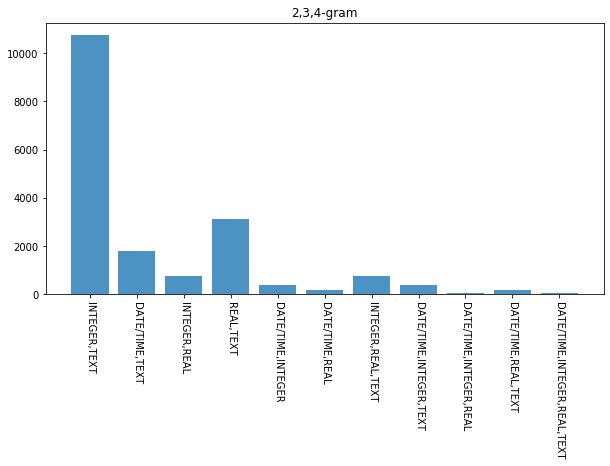

In [6]:
keys = list(two_gram_dict.keys()) + list(three_gram_dict.keys()) + list(four_gram_dict.keys())
values = list(two_gram_dict.values()) + list(three_gram_dict.values()) + list(four_gram_dict.values())
plt.figure(figsize=(10,5))
plt.bar(keys, values, alpha=0.8)
plt.title("2,3,4-gram")
plt.xticks(rotation=270)
plt.savefig('./figures/task1/2,3,4-gram.png')
plt.show()